In [3]:
import tensorflow as tf

from tensorflow.keras import models, Input 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import random

In [5]:
import os

import matplotlib.image as mpimg

In [7]:
data_dir = 'C:/Users/hamza/Desktop/projet machine learning/flowers'

In [9]:
flower_categories = os.listdir(data_dir)
flower_categories

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [11]:
os.path.join(data_dir,flower_categories[1])

'C:/Users/hamza/Desktop/projet machine learning/flowers\\dandelion'

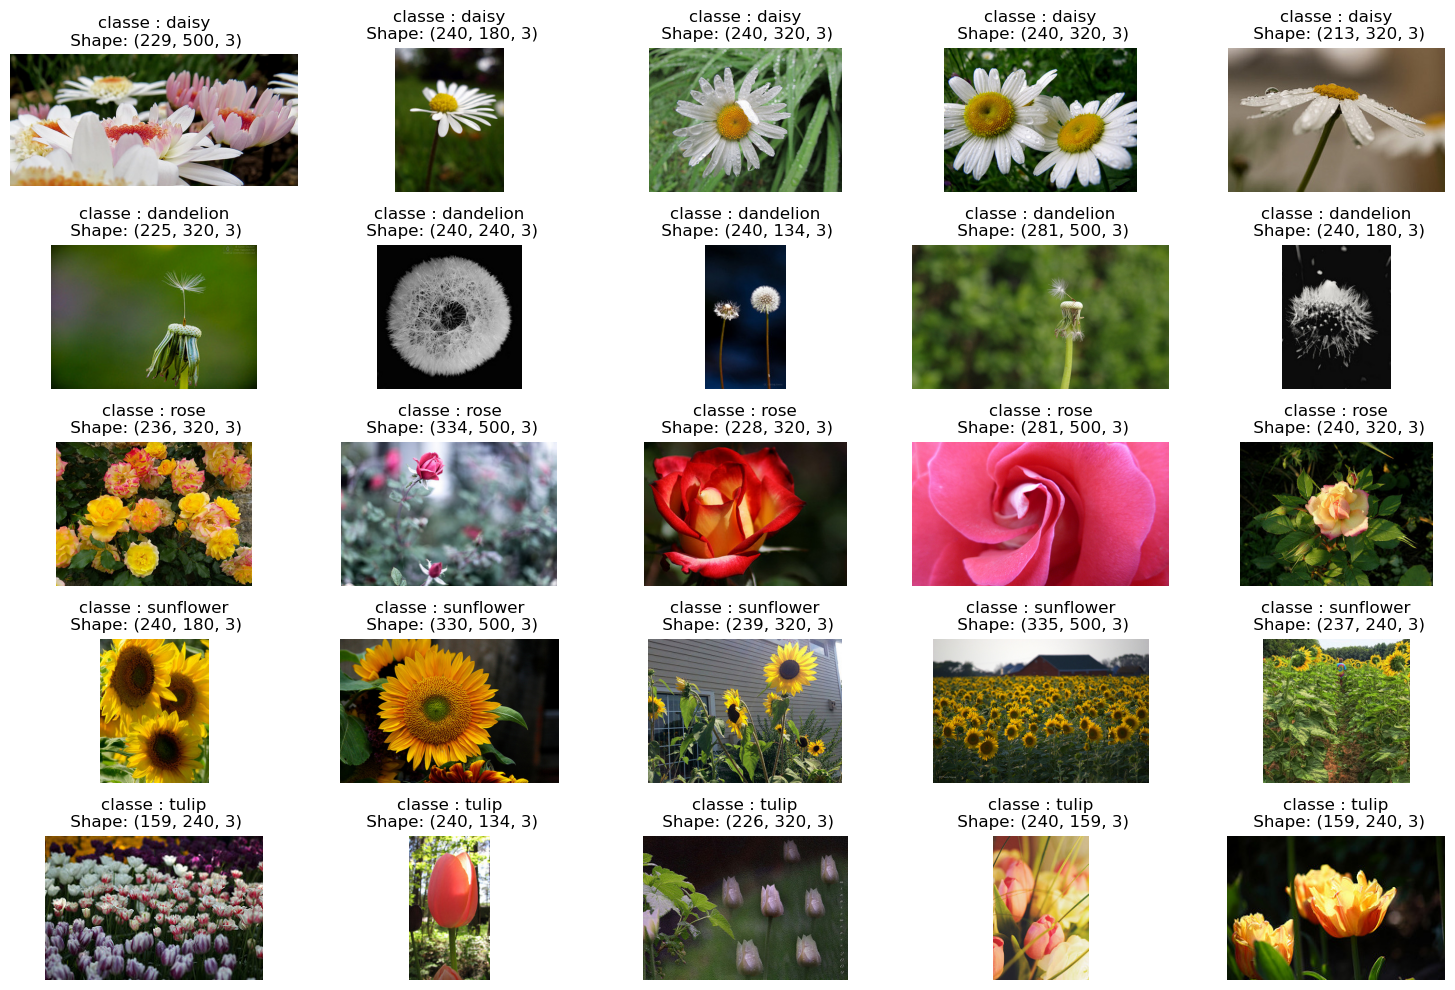

In [13]:
fig, axes = plt.subplots(len(flower_categories), 5, figsize=(15, 10))

for i, category in enumerate(flower_categories):
    category_path = os.path.join(data_dir, category)
    
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        selected_images = random.sample(images, 5)  
        
        for j, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name) #flowers/daisy/12652.jpg
            img = mpimg.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off') 
            axes[i, j].set_title(f"classe : {category}\n Shape: {img.shape}")  

        axes[i, 0].set_ylabel(f"Category: {category}", rotation=0, size='large', labelpad=45)

plt.tight_layout()
plt.show()

# Getting the data from folder "flowers"

In [15]:
flower_categories = os.listdir(data_dir)

In [17]:
flower_categories

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [19]:
from tensorflow.keras.preprocessing import image as keras_img

inputs = []
outputs = []
     
for category in flower_categories:
    category_path = os.path.join(data_dir,category ) #flowers/daisy  | flowers/tulip

    for image in os.listdir(category_path):
        image_path = os.path.join(category_path, image)
        img = keras_img.load_img(image_path, target_size=(240, 240))
        img = keras_img.img_to_array(img)
        
        inputs.append(img)
        outputs.append(category)

In [21]:
# transformer les données en tableaux numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

In [23]:
print(f'taille des inputs {inputs.shape}')
print(f'taille des outputs {outputs.shape}')

taille des inputs (4247, 240, 240, 3)
taille des outputs (4247,)


In [25]:
set(outputs)

{'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'}

# transforme output to one-hot vector

In [28]:
## Avant on encode les classe avec des valeurs de 0 à 4
outputs = [ flower_categories.index(output) for output in outputs ]

In [30]:
set(outputs)

{0, 1, 2, 3, 4}

In [32]:
## transformer les labels en one hot encoding
from tensorflow.keras.utils import to_categorical
outputs = to_categorical(outputs)

In [34]:
outputs

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# devide the data into training and testing

In [37]:
x = inputs
y = outputs

In [39]:
## Normalisation des images (valeurs des pixels entre 0-1)
x /= 255

In [41]:
print(f'valeurs des pixels après normalisation. max : {x.max()} , min : {x.min()}')

valeurs des pixels après normalisation. max : 1.0 , min : 0.0


In [43]:
from sklearn.model_selection import train_test_split

'''
train et test

train / validation / test : validation se passe en parralèle avec l'entrainement

train_test_split ==> 2 subsets, on a l'habitude de faire train set et subset avec train_test_split

validation ==> on la fait sur la méthode fit de keras lors de l'apprentissage d'un réseau de neurones

Cependant on peut faire en sorte qu'on ai un subset de validation en utilisant la méthode train_test_split

'''

In [46]:
x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.2, random_state = 2020)

In [48]:
x_train, x_validation, y_train, y_validation = train_test_split(x_tmp, y_tmp, test_size=0.15, random_state = 2025)

In [61]:
print(f'taille des données d\'apprentissage : {x_train.shape}')
print(f'taille des données de test : {x_test.shape}')
print(f'taille des données de validation : {x_validation.shape}')

taille des données d'apprentissage : (2887, 240, 240, 3)
taille des données de test : (850, 240, 240, 3)
taille des données de validation : (510, 240, 240, 3)


# Creating the model

In [128]:
data_augmentation = tf.keras.Sequential([
  Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [130]:
model = models.Sequential(name = 'cnn_flowers')

In [132]:
model.add(data_augmentation)

model.add(Conv2D(32, (3, 3), activation='relu', name='conv1'))
model.add(MaxPooling2D((2, 2), name='pooling1'))

model.add(Conv2D(64, (3, 3), activation='relu', name='conv2'))
model.add(MaxPooling2D((2, 2), name='pooling2'))

model.add(Conv2D(128, (3, 3), activation='relu', name='conv3'))
model.add(MaxPooling2D((2, 2), name='pooling3'))

model.add(Conv2D(128, (3, 3), activation='relu', name='conv4'))
model.add(MaxPooling2D((2, 2), name='pooling4'))

model.add(Flatten())

model.add(Dense(128, activation='relu', name='dense1'))

model.add(Dense(5, activation='softmax', name='sortie'))

In [134]:
model.summary()

Model: "cnn_flowers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling1 (MaxPooling2D)         │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling2 (MaxPooling2D)         │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling3 (MaxPooling2D)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling4 (MaxPooling2D)         │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sortie (Dense)                  │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,010,501 (11.48 MB)

 Trainable params: 3,010,501 (11.48 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
loss = tf.keras.losses.categorical_crossentropy

optimizer = Adam(learning_rate=1e-4)

metrics = ['accuracy'] 

# Compiler le modèle
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [138]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32 ,validation_data=(x_validation, y_validation))

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.3029 - loss: 1.5183 - val_accuracy: 0.4510 - val_loss: 1.2813
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.5005 - loss: 1.1702 - val_accuracy: 0.6020 - val_loss: 1.1138
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.5741 - loss: 1.0559 - val_accuracy: 0.6020 - val_loss: 1.0750
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.5896 - loss: 1.0367 - val_accuracy: 0.6039 - val_loss: 1.0559
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.5836 - loss: 1.0106 - val_accuracy: 0.6314 - val_loss: 1.0164
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.6201 - loss: 0.9389 - val_accuracy: 0.5941 - val_loss: 1.1076
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.6317 - loss: 0.9267 - val_accuracy: 0.6137 - val_loss: 1.0129
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.6562 - loss: 0.8968 - val_accu

In [140]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.7250617742538452
Test Accuracy: 0.755294144153595


# Data Augmentation


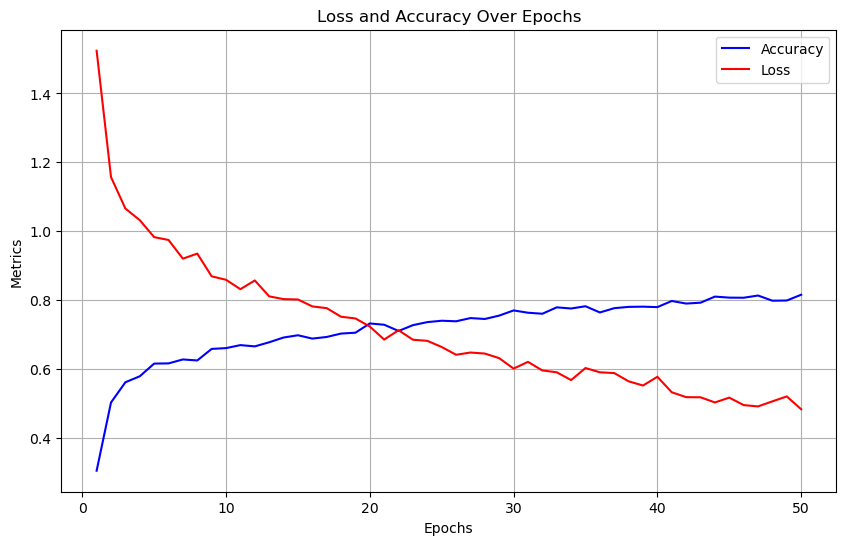

In [37]:
#import matplotlib.pyplot as plt

# Assuming you have a history object with recorded metrics
# Replace these with your actual loss and accuracy values
epochs = range(1, 51)  # Adjust the range based on your number of epochs
accuracy = [0.3057, 0.5036, 0.5622, 0.5796, 0.6164, 0.6170, 0.6284, 0.6255, 0.6590, 0.6613,
            0.6700, 0.6663, 0.6782, 0.6920, 0.6986, 0.6889, 0.6936, 0.7035, 0.7060, 0.7328,
            0.7291, 0.7110, 0.7279, 0.7367, 0.7407, 0.7391, 0.7484, 0.7458, 0.7556, 0.7706,
            0.7639, 0.7610, 0.7795, 0.7762, 0.7827, 0.7647, 0.7771, 0.7809, 0.7815, 0.7802,
            0.7980, 0.7905, 0.7930, 0.8107, 0.8077, 0.8074, 0.8138, 0.7988, 0.7994, 0.8161]
loss = [1.5238, 1.1574, 1.0660, 1.0324, 0.9832, 0.9749, 0.9207, 0.9354, 0.8695, 0.8594,
        0.8322, 0.8575, 0.8114, 0.8034, 0.8023, 0.7823, 0.7772, 0.7523, 0.7473, 0.7238,
        0.6861, 0.7132, 0.6856, 0.6824, 0.6645, 0.6420, 0.6485, 0.6455, 0.6321, 0.6019,
        0.6214, 0.5965, 0.5911, 0.5686, 0.6035, 0.5912, 0.5889, 0.5650, 0.5528, 0.5781,
        0.5332, 0.5191, 0.5187, 0.5037, 0.5177, 0.4960, 0.4922, 0.5069, 0.5212, 0.4839]

# Plotting loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label="Accuracy", color="blue")
plt.plot(epochs, loss, label="Loss", color="red")
plt.title("Loss and Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.grid(True)
plt.show()


In [142]:
model.save('flower_classifier_model.h5')

In [145]:
print(model.summary())


Model: "cnn_flowers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling1 (MaxPooling2D)         │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling2 (MaxPooling2D)         │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling3 (MaxPooling2D)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling4 (MaxPooling2D)         │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sortie (Dense)                  │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,031,505 (34.45 MB)

 Trainable params: 3,010,501 (11.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,021,004 (22.97 MB)

None
